In [1]:
import time
start_time = time.time()
from qiskit_ibm_provider import IBMProvider
provider = IBMProvider()
# Standard imports
import numpy as np
import pandas as pd
import time
import warnings

# Qiskit 
from qiskit import QuantumCircuit, transpile
from qiskit.circuit import Parameter
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes, EfficientSU2
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit_machine_learning.circuit.library import QNNCircuit
from qiskit.primitives import Sampler
from qiskit_algorithms.optimizers import COBYLA, L_BFGS_B, ADAM, SLSQP, AQGD
from qiskit_algorithms.utils import algorithm_globals

# Visualization libraries
from matplotlib import pyplot as plt
import seaborn as sns
from qiskit.visualization import plot_histogram
from IPython.display import clear_output

# Machine learning and preprocessing
from sklearn.datasets import load_iris, load_digits,load_wine, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.exceptions import ConvergenceWarning
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [3]:
def data_preprocess(dataset):
    data = dataset()
    dataset_features = data.data
    dataset_labels = data.target
    dataset_features = MinMaxScaler().fit_transform(dataset_features)
    algorithm_globals.random_seed = 4701
    data_set_num_features = dataset_features.shape[1]
    dataset_train_features, dataset_test_features, dataset_train_labels, dataset_test_labels = train_test_split(
        dataset_features, dataset_labels, train_size=0.8, random_state=algorithm_globals.random_seed)
    
    print(f'{dataset.__name__} preprocessed')
    return dataset_train_features, dataset_test_features, dataset_train_labels, dataset_test_labels, data_set_num_features

In [4]:
datasets = [load_iris, load_digits, load_wine, load_breast_cancer]  
for dataset in datasets:
    print(f'{dataset.__name__}')
    train_features, test_features, train_labels, test_labels, num_features = data_preprocess(dataset)
    
    svc = SVC()
    svc.fit(train_features, train_labels)
    
    svc_accuracy = svc.score(test_features, test_labels)
    
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=4701)
    rf_classifier.fit(train_features, train_labels)

    rf_accuracy = rf_classifier.score(test_features, test_labels)
    
    print(f'{dataset.__name__} SVC Score: {svc_accuracy:.4f}')
    print(f'{dataset.__name__} Random Forest Score: {rf_accuracy:.4f}'


load_iris
load_iris preprocessed
load_iris SVC Score: 0.9000
load_digits
load_digits preprocessed
load_digits SVC Score: 0.9917
load_wine
load_wine preprocessed
load_wine SVC Score: 1.0000
load_breast_cancer
load_breast_cancer preprocessed
load_breast_cancer SVC Score: 0.9825


Iris Data Quantum

In [ ]:
print(load_iris.DESCR)

In [5]:
train_features, test_features, train_labels, test_labels, num_features = data_preprocess(load_iris)
feature_map = ZZFeatureMap(feature_dimension=num_features, reps = 1)
ansatz = RealAmplitudes(num_qubits=num_features, reps = 3)
optimizer = COBYLA(maxiter=100)
sampler = Sampler()

load_iris preprocessed


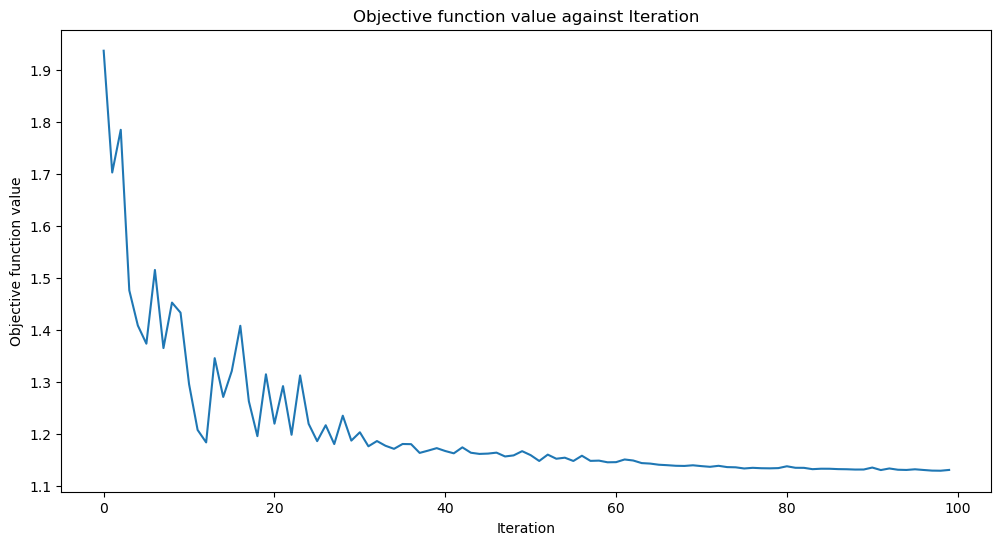

Training time: 46.642817974090576


In [6]:
plt.rcParams['figure.figsize'] = (12,6)

def callback_graph(weights, obj_func_eval):
             
# Append the value of the objective function to an array so we 
# can plot the iteration verses the objective function value
             
             clear_output(wait=True)
             objective_func_vals.append(obj_func_eval)
             plt.title('Objective function value against Iteration')
             plt.xlabel('Iteration')
             plt.ylabel('Objective function value')
             plt.plot(range(len(objective_func_vals)), objective_func_vals)
             
             plt.show()

vqc = VQC(
    sampler = sampler, 
    feature_map = feature_map,
    ansatz = ansatz, 
    optimizer = optimizer, 
    callback = callback_graph,)

# Clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features,train_labels)
elsapsed_time = time.time() - start 

print(f'Training time: {elsapsed_time}')

vqc_accuracy = vqc.score(test_features, test_labels)
print(f"VQC score on the Iris dataset:     {vqc_accuracy:.2f}")

In [7]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel

iris_feature_map = ZZFeatureMap(feature_dimension=num_features, reps=2, entanglement="linear")

sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)

iris_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=iris_feature_map)

In [8]:
from qiskit_machine_learning.algorithms import QSVC

qsvc_full = QSVC(quantum_kernel=iris_kernel)

qsvc_full.fit(train_features, train_labels)

qsvc_score = qsvc_full.score(test_features, test_labels)

print(f"QSVC classification test score: {qsvc_score}")

QSVC classification test score: 0.8666666666666667


Wine

In [12]:
train_features, test_features, train_labels, test_labels, num_features = data_preprocess(load_wine)
feature_map = ZZFeatureMap(feature_dimension=num_features, reps = 1)
ansatz = RealAmplitudes(num_qubits=num_features, reps = 3)
optimizer = COBYLA(maxiter=100)
sampler = Sampler()

load_wine preprocessed


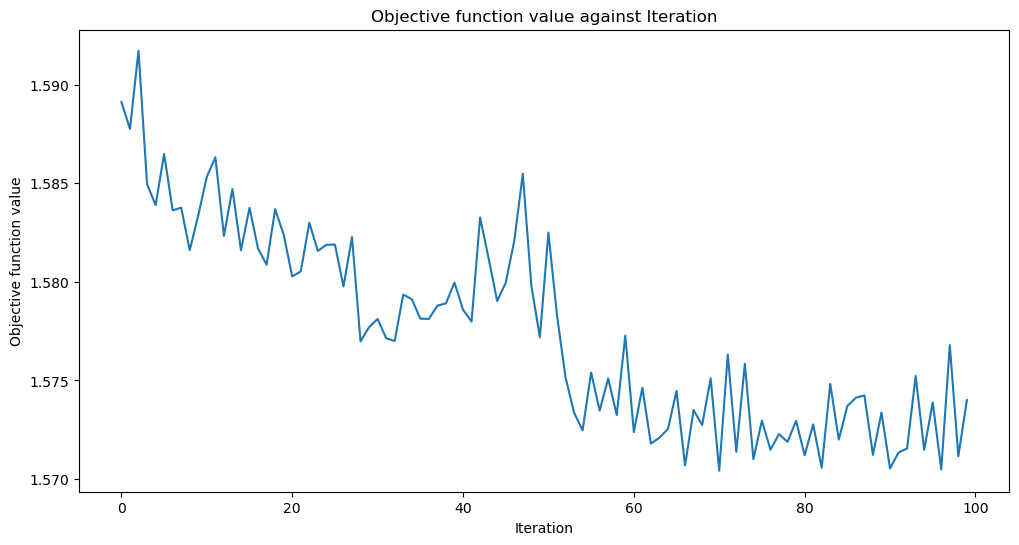

Training time: 2972.3758878707886


In [13]:
plt.rcParams['figure.figsize'] = (12,6)

def callback_graph(weights, obj_func_eval):
             
             
             clear_output(wait=True)
             objective_func_vals.append(obj_func_eval)
             plt.title('Objective function value against Iteration')
             plt.xlabel('Iteration')
             plt.ylabel('Objective function value')
             plt.plot(range(len(objective_func_vals)), objective_func_vals)
             
             plt.show()

vqc = VQC(
    sampler = sampler, 
    feature_map = feature_map,
    ansatz = ansatz, 
    optimizer = optimizer, 
    callback = callback_graph,)

# Clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features,train_labels)
elsapsed_time = time.time() - start 

print(f'Training time: {elsapsed_time}')
vqc_accuracy = vqc.score(test_features, test_labels)
print(f"VQC score on the Wine dataset:     {vqc_accuracy:.2f}")

In [14]:
wine_feature_map = ZZFeatureMap(feature_dimension=num_features, reps=2, entanglement="linear")

sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)

wine_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=wine_feature_map)

In [15]:
qsvc_full = QSVC(quantum_kernel=wine_kernel)

qsvc_full.fit(train_features, train_labels)

qsvc_score = qsvc_full.score(test_features, test_labels)

print(f"QSVC classification test score: {qsvc_score:.2f}")

QSVC classification test score: 0.8611111111111112


In [4]:
import pandas as pd

# Load the dataset
seeds = pd.read_csv('seeds_dataset.txt', sep=r'\s+', header=None)  # Adjust sep if necessary
seeds.columns = [
    'area', 'perimeter', 'compactness', 
    'length_kernel', 'width_kernel', 
    'asymmetry_coefficient', 'length_kernel_groove', 'type'
]

    area  perimeter  compactness  length_kernel  width_kernel  \
0  15.26      14.84       0.8710          5.763         3.312   
1  14.88      14.57       0.8811          5.554         3.333   
2  14.29      14.09       0.9050          5.291         3.337   
3  13.84      13.94       0.8955          5.324         3.379   
4  16.14      14.99       0.9034          5.658         3.562   

   asymmetry_coefficient  length_kernel_groove  type  
0                  2.221                 5.220     1  
1                  1.018                 4.956     1  
2                  2.699                 4.825     1  
3                  2.259                 4.805     1  
4                  1.355                 5.175     1  


In [5]:
# Split data into features and labels
dataset_features = seeds.drop('type', axis=1).values  # Assuming 'type' is the label column
dataset_labels = seeds['type'].values - 1  # Adjusting labels to start from 0 if necessary


dataset_features = MinMaxScaler().fit_transform(dataset_features)
algorithm_globals.random_seed = 4701

dataset_train_features, dataset_test_features, dataset_train_labels, dataset_test_labels = train_test_split(
    dataset_features, dataset_labels, train_size=0.8, random_state=algorithm_globals.random_seed)


In [11]:
seeds_data = seeds.to_numpy()
num_features = dataset_features.shape[1]
feature_map = ZZFeatureMap(feature_dimension=num_features, reps = 1)
ansatz = RealAmplitudes(num_qubits=num_features, reps = 3)
optimizer = COBYLA(maxiter=100)
sampler = Sampler()

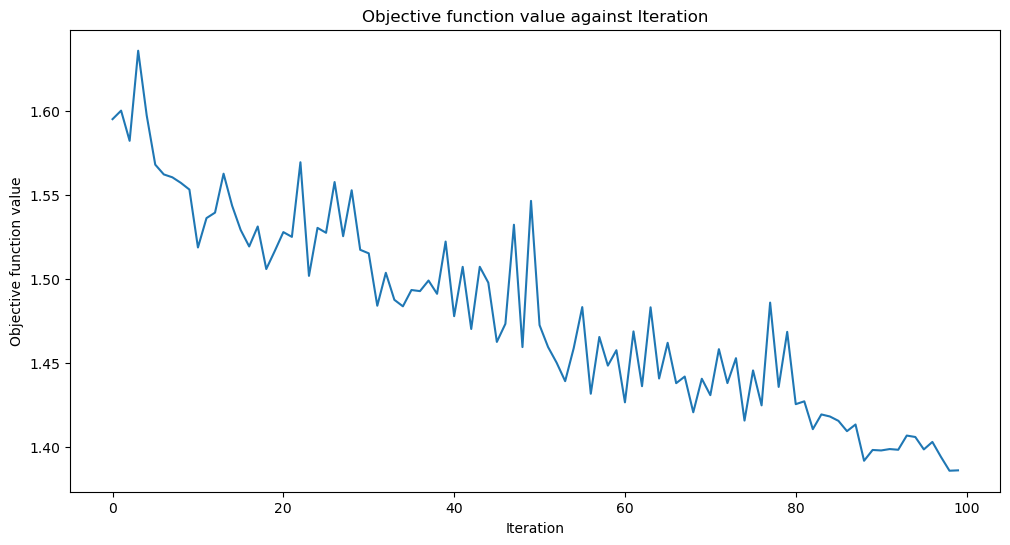

Training time: 144.08731293678284


In [12]:
plt.rcParams['figure.figsize'] = (12,6)

def callback_graph(weights, obj_func_eval):
             
             
             clear_output(wait=True)
             objective_func_vals.append(obj_func_eval)
             plt.title('Objective function value against Iteration')
             plt.xlabel('Iteration')
             plt.ylabel('Objective function value')
             plt.plot(range(len(objective_func_vals)), objective_func_vals)
             
             plt.show()

vqc = VQC(
    sampler = sampler, 
    feature_map = feature_map,
    ansatz = ansatz, 
    optimizer = optimizer, 
    callback = callback_graph,)

# Clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(dataset_train_features,dataset_train_labels)
elsapsed_time = time.time() - start 

print(f'Training time: {elsapsed_time}')
vqc_accuracy = vqc.score(test_features, test_labels)
print(f"VQC score on the Seeds dataset:     {vqc_accuracy:.2f}")

In [15]:
seeds_feature_map = ZZFeatureMap(feature_dimension=num_features, reps=2, entanglement="linear")

sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)

seeds_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=seeds_feature_map)

In [18]:
from qiskit_machine_learning.algorithms import QSVC
qsvc_full = QSVC(quantum_kernel=seeds_kernel)

qsvc_full.fit(dataset_train_features, dataset_train_labels)

qsvc_score = qsvc_full.score(dataset_test_features, dataset_test_labels)

print(f"QSVC classification test score: {qsvc_score:.2f}")

QSVC classification test score: 0.9047619047619048


Breast Cancer Diagnostic 

In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

data = load_breast_cancer()

# Select only the mean features (the first 10 features)
feature_names = data.feature_names[:10]
X_means = data.data[:, :10] 

scaler = StandardScaler()
X_means_scaled = scaler.fit_transform(X_means)

X_train_means, X_test_means, y_train, y_test = train_test_split(X_means_scaled, data.target, test_size=0.2, random_state=42)

rf_classifier_means = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_means.fit(X_train_means, y_train)

# Feature importance from the Random Forest model based on mean features
feature_importances_means = rf_classifier_means.feature_importances_
print("Feature importances (mean features) from Random Forest Classifier:")
for name, importance in zip(feature_names, feature_importances_means):
    print(f"{name}: {importance:.4f}")

# Evaluate the classifier on the mean features
rf_accuracy_means = rf_classifier_means.score(X_test_means, y_test)
print(f"\nRandom Forest Test Accuracy (mean features): {rf_accuracy_means:.4f}")


Feature importances (mean features) from Random Forest Classifier:
mean radius: 0.1262
mean texture: 0.0664
mean perimeter: 0.1440
mean area: 0.1079
mean smoothness: 0.0284
mean compactness: 0.0468
mean concavity: 0.1405
mean concave points: 0.3017
mean symmetry: 0.0194
mean fractal dimension: 0.0188

Random Forest Test Accuracy (mean features): 0.9474


In [12]:
feature_map = ZZFeatureMap(feature_dimension=10, reps = 1)
ansatz = RealAmplitudes(num_qubits=10, reps = 3)
optimizer = COBYLA(maxiter=100)
sampler = Sampler()

In [15]:
vqc_accuracy = vqc.score(X_test_means, y_test)
print(f"VQC score on the Iris dataset:     {vqc_accuracy:.2f}")

VQC score on the Iris dataset:     0.58


In [16]:
from sklearn.datasets import load_breast_cancer
breast_cancer_data = load_breast_cancer()
features = breast_cancer_data.data
labels = breast_cancer_data.target
from sklearn.preprocessing import MinMaxScaler
features = MinMaxScaler().fit_transform(features)
df = pd.DataFrame(features, columns=breast_cancer_data.feature_names)
df['class'] = [breast_cancer_data.target_names[label] for label in labels]
feature_names = breast_cancer_data.feature_names
feature_means = feature_names[:10]
feature_names = breast_cancer_data.feature_names
feature_means = feature_names[:10]
dataMalignant = df[df['class'] == 'malignant']
dataBenign = df[df['class'] == 'benign']
from sklearn.model_selection import train_test_split
from qiskit_algorithms.utils import algorithm_globals

algorithm_globals.random_seed = 4701

train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size = 0.8, random_state = algorithm_globals.random_seed)
train_score_c4 = svc.score(train_features, train_labels)
test_score_c4 = svc.score(test_features, test_labels)

print(f"Classical SVC on the training dataset: {train_score_c4:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c4:.2f}")
from qiskit.circuit.library import ZZFeatureMap

num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps = 1)
#feature_map.decompose().draw('mpl', fold=50)
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps = 3)
#ansatz.decompose().draw('mpl', fold = 25)
from qiskit_algorithms.optimizers import COBYLA

optimizer = COBYLA(maxiter=100)
from qiskit.primitives import Sampler

sampler = Sampler()

Classical SVC on the training dataset: 0.98
Classical SVC on the test dataset:     0.98


In [17]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []

# objective function characterizes the distance between the predictions and known labeled data.

plt.rcParams['figure.figsize'] = (12,6)

def callback_graph(weights, obj_func_eval):
             
# Append the value of the objective function to an array so we 
# can plot the iteration verses the objective function value
             
             clear_output(wait=True)
             objective_func_vals.append(obj_func_eval)
             plt.title('Objective function value against Iteration')
             plt.xlabel('Iteration')
             plt.ylabel('Objective function value')
             plt.plot(range(len(objective_func_vals)), objective_func_vals)
             
             plt.show()

In [ ]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler = sampler, 
    feature_map = feature_map,
    ansatz = ansatz, 
    optimizer = optimizer, 
    callback = callback_graph,)

# Clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features,train_labels)
elsapsed_time = time.time() - start 

print(f'Training time: {elsapsed_time}')

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from qiskit_algorithms.utils import algorithm_globals
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_algorithms.optimizers import COBYLA
from qiskit.primitives import Sampler
from matplotlib import pyplot as plt
from IPython.display import clear_output
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

# Load the breast cancer dataset
breast_cancer_data = load_breast_cancer()
features = breast_cancer_data.data
labels = breast_cancer_data.target

# Normalize the features
features = MinMaxScaler().fit_transform(features)

# Convert the features into a DataFrame and add the target labels
df = pd.DataFrame(features, columns=breast_cancer_data.feature_names)
df['class'] = [breast_cancer_data.target_names[label] for label in labels]

# Prepare data for classification
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, random_state=4701)

# Initialize the quantum classifier components
feature_map = ZZFeatureMap(feature_dimension=len(breast_cancer_data.feature_names), reps=1)
ansatz = RealAmplitudes(num_qubits=len(breast_cancer_data.feature_names), reps=3)
optimizer = COBYLA(maxiter=100)
sampler = Sampler()

# Define the callback function for the optimizer
objective_func_vals = []
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title('Objective function value against Iteration')
    plt.xlabel('Iteration')
    plt.ylabel('Objective function value')
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

# Initialize and train the VQC classifier
vqc = VQC(sampler=sampler, feature_map=feature_map, ansatz=ansatz, 
          optimizer=optimizer, callback=callback_graph)
start = time.time()
vqc.fit(train_features, train_labels)
elapsed_time = time.time() - start

print(f'Training time: {elapsed_time}')

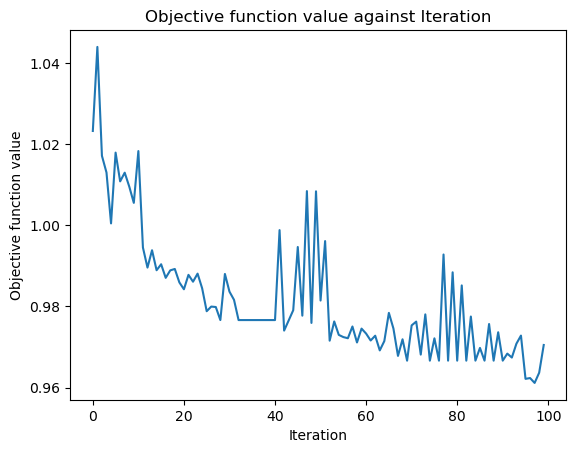

Training time: 1295.7349660396576


In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from qiskit_algorithms.utils import algorithm_globals
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_algorithms.optimizers import COBYLA
from qiskit.primitives import Sampler
from matplotlib import pyplot as plt
from IPython.display import clear_output
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

# Load the breast cancer dataset
breast_cancer_data = load_breast_cancer()
features = breast_cancer_data.data
labels = breast_cancer_data.target

# Normalize the features
features = MinMaxScaler().fit_transform(features)

# Convert the features into a DataFrame and add the target labels
df = pd.DataFrame(features, columns=breast_cancer_data.feature_names)
df['class'] = [breast_cancer_data.target_names[label] for label in labels]

# Select only the first 10 mean feature columns and the 'class' column
mean_features_df = df.iloc[:, :10]
mean_features_df['class'] = df['class']

# Split the dataset into training and testing sets
X = mean_features_df.iloc[:, :-1].values  # Predictors: mean features
y = labels  # Target: class labels

# Split the data
train_features, test_features, train_labels, test_labels = train_test_split(
    X, y, train_size=0.8, random_state=4701)

# Initialize the quantum classifier components
num_qubits = len(mean_features_df.columns) - 1  # Exclude the class column
feature_map = ZZFeatureMap(feature_dimension=num_qubits, reps=1)
ansatz = RealAmplitudes(num_qubits=num_qubits, reps=3)
optimizer = COBYLA(maxiter=100)
sampler = Sampler()

# Define the callback function for the optimizer
objective_func_vals = []
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title('Objective function value against Iteration')
    plt.xlabel('Iteration')
    plt.ylabel('Objective function value')
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

# Initialize and train the VQC classifier
vqc = VQC(sampler=sampler, feature_map=feature_map, ansatz=ansatz,
          optimizer=optimizer, callback=callback_graph)

start = time.time()
vqc.fit(train_features, train_labels)
elapsed_time = time.time() - start

print(f'Training time: {elapsed_time}')


In [7]:
score = vqc.score(test_features, test_labels)
print(f'Test score: {score}')

Test score: 0.6228070175438597


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from scipy.stats import norm

In [18]:
def bootstrap_score(estimator, X, y, n_bootstraps=1000):
    np.random.seed(42)  # 
    bootstrapped_scores = []

    n_samples = X.shape[0]
    for i in range(n_bootstraps):
        indices = np.random.choice(range(n_samples), size=n_samples, replace=True)
        X_bootstrap = X[indices]
        y_bootstrap = y[indices]

        # Evaluate the classifier on the bootstrap sample
        score = estimator.score(X_bootstrap, y_bootstrap)
        bootstrapped_scores.append(score)
        print('Iteration',i+1,end='\r')

        # Update the plot and information every 10 iterations
        if (i + 1) % 5 == 0:
            clear_output(wait=True)
            plt.figure(figsize=(10, 6))
            plt.hist(bootstrapped_scores, bins=30, alpha=0.75, edgecolor='black')
            mean_score = np.mean(bootstrapped_scores)
            std_score = np.std(bootstrapped_scores)
            conf_lower, conf_upper = np.percentile(bootstrapped_scores, [2.5, 97.5])
            
            # Add mean, std, and 95% CI to the plot
            plt.axvline(x=mean_score, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_score:.3f}')
            plt.axvline(x=conf_lower, color='green', linestyle='dashed', linewidth=2, label='95% CI')
            plt.axvline(x=conf_upper, color='green', linestyle='dashed', linewidth=2)
            plt.title(f'Distribution of Bootstrapped Test Scores (Iteration {i + 1})')
            plt.xlabel('Test Score')
            plt.ylabel('Frequency')
            plt.legend()
            plt.show()
            
            print(f'Score: {score:.3f}, Mean: {mean_score:.3f}, Std: {std_score:.3f}, 95% CI: [{conf_lower:.3f}, {conf_upper:.3f}]')

    # Final output including a vertical line for the mean and 95% confidence intervals
    clear_output(wait=True)
    plt.figure(figsize=(10, 6))
    plt.hist(bootstrapped_scores, bins=30, alpha=0.75, edgecolor='black')
    plt.axvline(x=mean_score, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_score:.3f}')
    plt.axvline(x=conf_lower, color='green', linestyle='dashed', linewidth=2, label='95% CI')
    plt.axvline(x=conf_upper, color='green', linestyle='dashed', linewidth=2)
    plt.title('Final Distribution of Bootstrapped Test Scores')
    plt.xlabel('Test Score')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
    
    print(f'Final Mean: {mean_score:.3f}, Std: {std_score:.3f}, 95% CI: [{conf_lower:.3f}, {conf_upper:.3f}]')

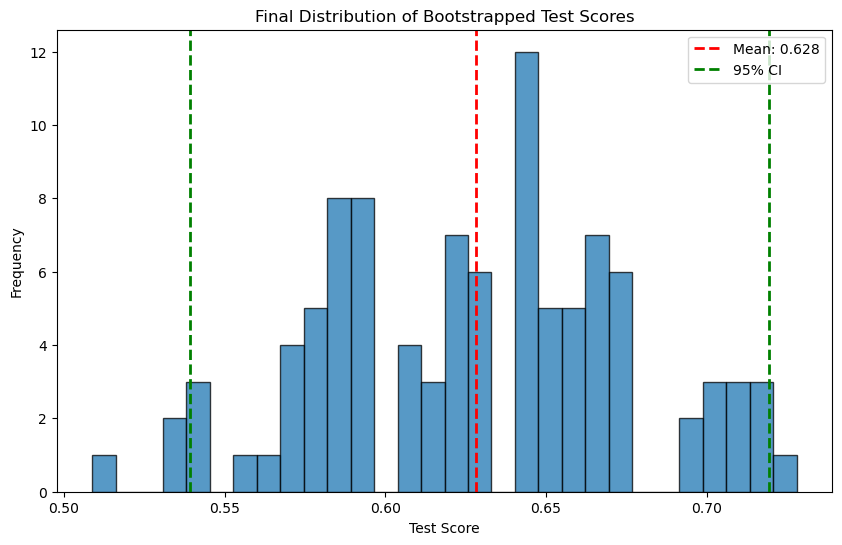

Final Mean: 0.628, Std: 0.047, 95% CI: [0.539, 0.719]


In [19]:
bootstrapped_scores = bootstrap_score(vqc, test_features, test_labels, n_bootstraps=100)

In [44]:
from sklearn.inspection import permutation_importance
r = permutation_importance(vqc, test_features, test_labels,
                           n_repeats=5,
                           random_state=42)

In [45]:
feature_names = df.columns[:10]
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{feature_names[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

mean radius0.037 +/- 0.017


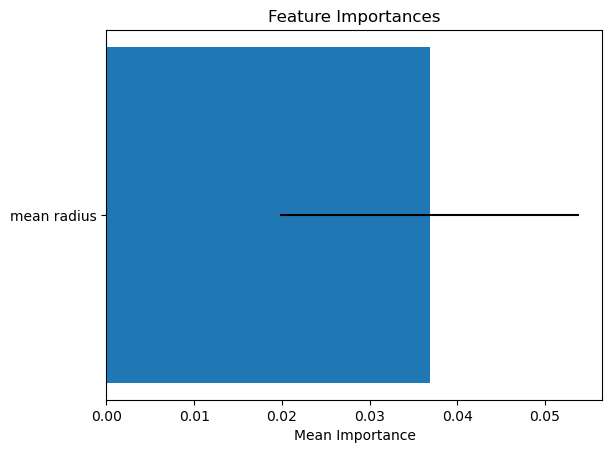

In [46]:
import matplotlib.pyplot as plt
import numpy as np

feature_names = df.columns[:10]

# Indices of features, sorted by importance
sorted_idx = r.importances_mean.argsort()[::-1]

# Prepare labels and their corresponding importance scores and std deviations
labels = np.array(feature_names)[sorted_idx]
importance_means = r.importances_mean[sorted_idx]
importance_stds = r.importances_std[sorted_idx]

# Filter based on your criteria for significance
significant_indices = [i for i in range(len(importance_means)) if importance_means[i] - 2 * importance_stds[i] > 0]
significant_labels = labels[significant_indices]
significant_means = importance_means[significant_indices]
significant_stds = importance_stds[significant_indices]

# Plot
plt.barh(significant_labels, significant_means, xerr=significant_stds, align='center')
plt.xlabel('Mean Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


In [47]:
def vqc_predict_proba(X):
    # Assuming your VQC is set up to return probabilities for each class
    # Adjust this function as necessary to match how your VQC outputs predictions
    predictions = np.array([vqc.predict(datapoint.reshape(1, -1)) for datapoint in X])
    return predictions


In [ ]:
import shap

# Assuming you have your data `X` prepared
X_sample = shap.utils.sample(X, 100)  # Using a sample of 100 instances for efficiency

# Initialize the explainer with the model prediction function and the sample data
explainer = shap.KernelExplainer(model=vqc_predict_proba, data=X_sample)

# Calculate SHAP values (this can be computationally intensive)
shap_values = explainer.shap_values(X_sample)

# Visualize the first prediction's explanation
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_sample[0])


  0%|          | 0/100 [00:00<?, ?it/s]